In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%run "../all_numerical_data.ipynb"

In [3]:
base_estimator = DecisionTreeClassifier()

clf = AdaBoostClassifier(base_estimator=base_estimator)

param_grid = {
    'base_estimator__max_depth': [1, 2, 3, 4, 5],
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    
}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_


In [12]:
max_depth = best_params['base_estimator__max_depth']
n_estimators = best_params['n_estimators']
learning_rate = best_params['learning_rate']
print(f'Best max_depth: {max_depth}')
print(f'Best n_estimators: {n_estimators}')
print(f'Best learning_rate: {learning_rate}')

base_estimator = DecisionTreeClassifier(max_depth=max_depth)

clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print('Precision: ', precision_score(y_val, y_pred, average='macro'))
print('Recall: ', recall_score(y_val, y_pred, average='macro'))
print('F1-Score: ', f1_score(y_val, y_pred, average='macro'))


Best max_depth: 4
Best n_estimators: 100
Best learning_rate: 1.0
Accuracy: 0.972972972972973
Precision:  0.9705254851531447
Recall:  0.9524072128851541
F1-Score:  0.9607832829739203


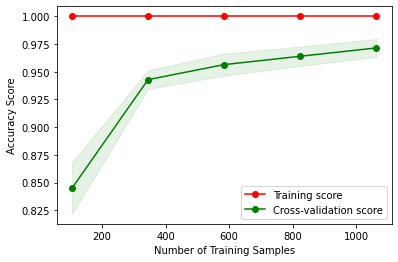

In [17]:
X = np.concatenate((x_train, x_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
train_sizes, train_scores, val_scores = learning_curve(clf, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")
plt.show()
